In [1]:
%matplotlib inline

# Uranus

                                   uranus                model                ratio
              radius           2.5362e+09          2.59845e+09             0.976045
               gsurf           900.760174           858.121853             1.049688



Text(0,0.5,'$Y,\\ Z$')

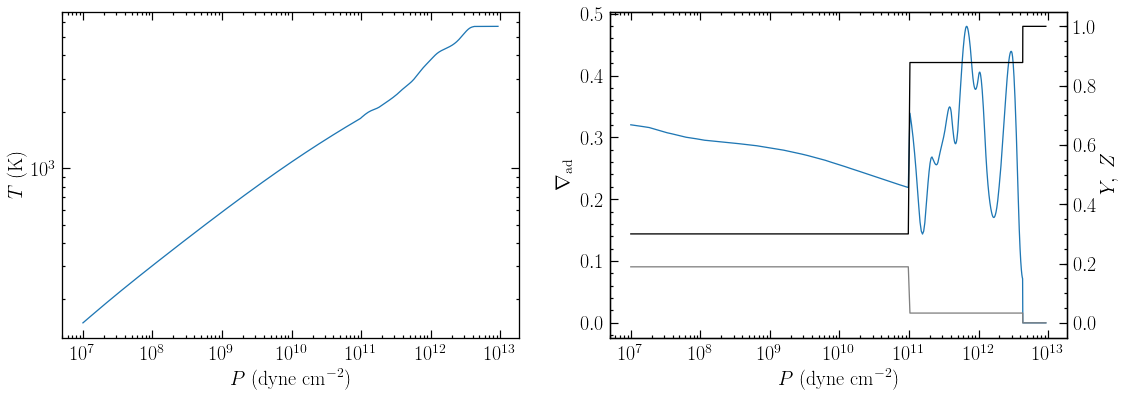

In [217]:
'''three-layer static model for present-day uranus'''

import ongp; reload(ongp) # reload to catch any changes to the module

mu = const.uranus_mass / const.mearth # 14.5
ru = const.uranus_rvol
gu = (const.cgrav * const.uranus_mass / const.uranus_rvol ** 2)

e = ongp.evol({'z_eos_option':'reos water', 
               'atm_option':'f11_tables u', 
               'path_to_data':'/Users/chris/ongp/data/'})
e.static({'mtot':'u', 
          'mcore':1.51, 
          'z1':0.3,
          'z2':0.878,
          't10':150.,
          'y1':0.189,
          'y2':0.033,
          'transition_pressure':0.1,
          'core_prho_relation':'hm89 rock',
          'switch_z_grada':True # control to ask Z eos for grada in zones where Z > 0.5. otherwise, just use H/He grada
         })

print ('%20s %20s %20s %20s' % ('', 'uranus', 'model', 'ratio'))
print ('%20s %20g %20g %20f' % ('radius', ru, e.rtot, ru / e.rtot))
print ('%20s %20f %20f %20f' % ('gsurf', gu, e.surface_g, gu / e.surface_g))
print ()

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].loglog(e.p, e.t)
[z.set_xlabel(r'$P\ ({\rm dyne\ cm}^{-2})$') for z in ax]
ax[0].set_ylabel(r'$T\ ({\rm K})$')

ax[1].semilogx(e.p, e.grada)
axr = ax[1].twinx()
axr.semilogx(e.p, e.y, 'gray')
axr.semilogx(e.p, e.z, 'k')
ax[1].set_ylabel(r'$\nabla_{\rm ad}$')
axr.set_ylabel(r'$Y,\ Z$')
# ax.legend()



/Users/chris/ongp/ongp.py:1048: RuntimeWarning: invalid value encountered in sqrt
  self.csound = np.sqrt(self.p / self.rho * self.gamma1)


                                   uranus                model                ratio
                mass            14.525969            14.525969             1.000000
              radius           2.5362e+09          2.57124e+09             0.986373
               gsurf           900.760174           876.377308             1.027822



Text(0,0.5,'$Y,\\ Z$')

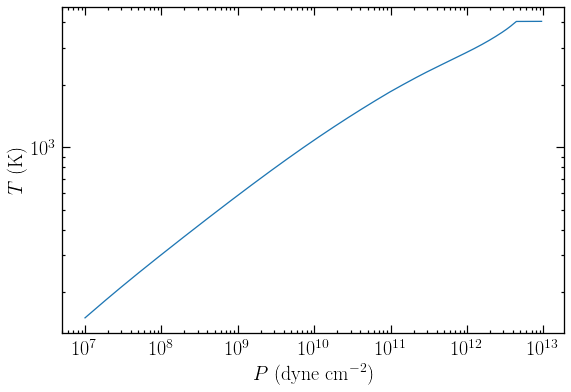

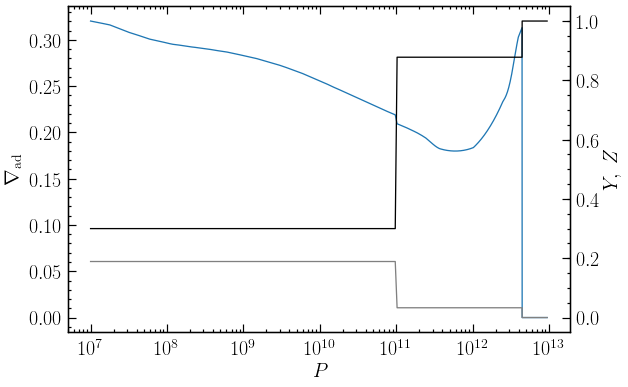

In [218]:
'''same, but get grada from H/He only, including in middle water-rich layer'''

import ongp; reload(ongp) # reload to catch any changes to the module

mu = const.uranus_mass / const.mearth # 14.5
ru = const.uranus_rvol
gu = (const.cgrav * const.uranus_mass / const.uranus_rvol ** 2)

f = ongp.evol({'z_eos_option':'reos water', 
               'atm_option':'f11_tables u', 
               'path_to_data':'/Users/chris/ongp/data/'})
f.static({'mtot':'u', 
          'mcore':1.51, 
          'z1':0.3,
          'z2':0.878,
          't10':150.,
          'y1':0.189,
          'y2':0.033,
          'transition_pressure':0.1,
          'core_prho_relation':'hm89 rock',
          'switch_z_grada':False # control to ask Z eos for grada in zones where Z > 0.5. otherwise, just use H/He grada
         })

'''the large `core' mass means H/He envelope extends only to relatively low pressures
(e.g., p ~ 0.1 Mbar) which seems necessary to avoid going off the scvh tables
by being too cold at P > 11.4 Mbar. this issue usually manifests as nans in grada.'''


print ('%20s %20s %20s %20s' % ('', 'uranus', 'model', 'ratio'))
print ('%20s %20f %20f %20f' % ('mass', mu, f.mtot / const.mearth, mu / f.mtot * const.mearth))
print ('%20s %20g %20g %20f' % ('radius', ru, f.rtot, ru / f.rtot))
print ('%20s %20f %20f %20f' % ('gsurf', gu, f.surface_g, gu / f.surface_g))
print ()

plt.figure(figsize=(9, 6))
plt.loglog(f.p, f.t)
plt.xlabel(r'$P\ ({\rm dyne\ cm}^{-2})$')
plt.ylabel(r'$T\ ({\rm K})$')


fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.semilogx(f.p, f.grada)

axr = ax.twinx()
axr.semilogx(f.p, f.y, 'gray')
axr.semilogx(f.p, f.z, 'k')
ax.set_xlabel(r'$P$')
ax.set_ylabel(r'$\nabla_{\rm ad}$')
axr.set_ylabel(r'$Y,\ Z$')
# ax.legend()



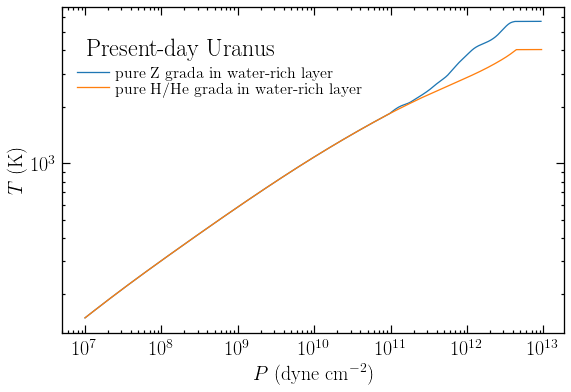

In [236]:
# comparison
plt.figure(figsize=(9, 6))
plt.loglog(e.p, e.t, label='pure Z grada in water-rich layer')
plt.loglog(f.p, f.t, label='pure H/He grada in water-rich layer')
plt.xlabel(r'$P\ ({\rm dyne\ cm}^{-2})$')
plt.ylabel(r'$T\ ({\rm K})$')
plt.text(0.05, 0.9, 'Present-day Uranus', ha='left', va='top', fontsize=24, transform=plt.gca().transAxes)
plt.legend(loc=2, bbox_to_anchor=(0, 0.86))
plt.savefig('/Users/chris/jsevol/figures/uranus_PT_gradas.pdf', bbox_inches='tight')

### Evolutionary models

In [240]:
''' before try to evolve, find starting / ending t10s that give calculable static models'''

import ongp; reload(ongp)

e = ongp.evol({'z_eos_option':'reos water', 
               'atm_option':'f11_tables u', 
               'path_to_data':'/Users/chris/ongp/data/'})

static_params = {'mtot':'u', 
          'mcore':1.51, 
          'z1':0.3,
          'z2':0.878,
          'y1':0.189,
          'y2':0.033,
          'transition_pressure':0.1,
          'core_prho_relation':'hm89 rock',
          'skip_extra_derivatives':False,
          'switch_z_grada':True # control to ask Z eos for grada in zones where Z > 0.5. otherwise, just use H/He grada
         }

print('{:>8} {:>8} {:>8} {:>8}'.format('t10', 'g', 'teff', 'tint'))
for t10 in (670, 148.6):
    static_params['t10'] = t10
    e.static(static_params)
    print('{:>8.1f} {:>8.2f} {:>8.2f} {:>8.2f}'.format(t10, e.surface_g*1e-2, e.teff, e.tint))

     t10        g     teff     tint
   670.0     4.01   157.62   156.51
   148.6     8.60    59.38    27.18


In [241]:
import ongp; reload(ongp)

e = ongp.evol({'z_eos_option':'reos water', 
               'atm_option':'f11_tables u', 
               'path_to_data':'/Users/chris/ongp/data/'})

static_params = {'mtot':'u', 
          'mcore':1.51, 
          'z1':0.3,
          'z2':0.878,
          'y1':0.189,
          'y2':0.033,
          'transition_pressure':0.1,
          'core_prho_relation':'hm89 rock',
          'skip_extra_derivatives':False,
          'switch_z_grada':True # control to ask Z eos for grada in zones where Z > 0.5. otherwise, just use H/He grada
         }

evolve_params = static_params.copy()
evolve_params['which_t'] = 't10'
evolve_params['start_t'] = 670.
evolve_params['end_t'] = 150.
evolve_params['max_timestep'] = 6e8
evolve_params['target_timestep'] = 3e8

e.evolve(evolve_params)

  step  iters iters_he   retr  limit   t10       teff     radius      dt_yr    age_gyr   nz_grady   nz_shell    k_trans    k_grady    k_shell     y1     et_s 
     0     24       -1      0 maxinc 665.0  1.570e+02  3.791e+09  2.776e+06  0.000e+00          0          0        872         -1         -1  0.189      0.9
     1     24       -1      0 maxinc 655.0  1.558e+02  3.755e+09  6.968e+06  2.776e-03          0          0        873         -1         -1  0.189      1.5
     2     25       -1      0 maxdt1 635.0  1.533e+02  3.696e+09  1.585e+07  9.744e-03          0          0        874         -1         -1  0.189      2.0
     3     23       -1      0 maxdt1 605.0  1.495e+02  3.617e+09  2.762e+07  2.559e-02          0          0        875         -1         -1  0.189      2.5
     4     22       -1      0 maxdt1 575.0  1.457e+02  3.540e+09  3.209e+07  5.321e-02          0          0        876         -1         -1  0.189      3.0
     5     22       -1      0 maxdt1 545.0  1.419e+

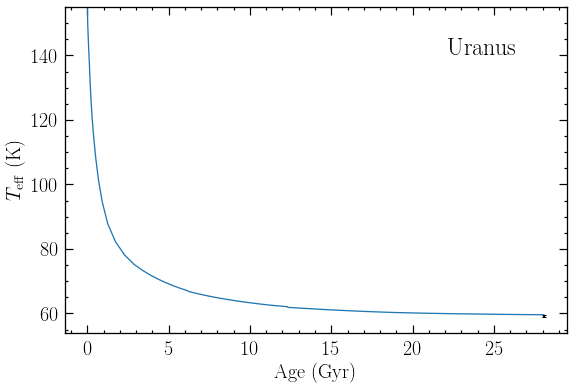

In [242]:
plt.figure(figsize=(9, 6))
plt.plot(e.history['age'], e.history['teff'])

teff, dteff = 59.1, 0.3
plt.errorbar(e.history['age'][-1], teff, dteff, ecolor='k', elinewidth=2, capsize=2, capthick=1)

plt.xlabel(r'${\rm Age}\ ({\rm Gyr})$')
plt.ylabel(r'$T_{\rm eff}\ ({\rm K})$')
plt.ylim(ymax=155)
plt.text(0.9, 0.9, 'Uranus', ha='right', va='top', transform=plt.gca().transAxes, fontsize=24)

plt.savefig('/Users/chris/jsevol/figures/uranus_teff_age.pdf', bbox_inches='tight')

In [243]:
with open('uranus.pkl', 'wb') as f:
    import pickle
    pickle.dump(e, f)

# Neptune

                                  neptune                model                ratio
              radius           2.4622e+09          2.68187e+09             0.918091
               gsurf          1127.456624           950.323930             1.186392



Text(0,0.5,'$Y,\\ Z$')

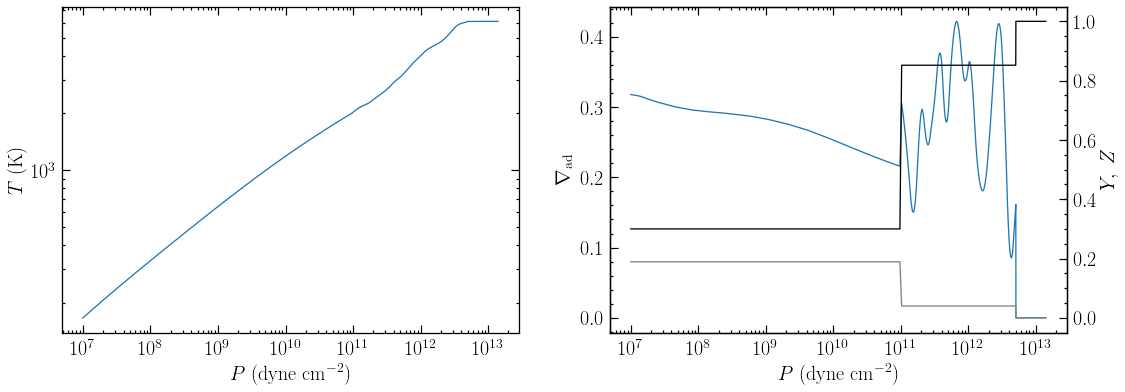

In [246]:
'''three-layer static model for present-day neptune'''

import ongp; reload(ongp) # reload to catch any changes to the module

mn = const.neptune_mass / const.mearth
rn = const.neptune_rvol
gn = (const.cgrav * const.neptune_mass / const.neptune_rvol ** 2)

e = ongp.evol({'z_eos_option':'reos water', 
               'atm_option':'f11_tables n', 
               'path_to_data':'/Users/chris/ongp/data/'})

e.static({'mtot':'n', 
          'mcore':2.85, 
          'z1':0.3,
          'z2':0.852,
          'y1':0.27*(1. - 0.3),
          'y2':0.27*(1. - 0.852),
          't10':166.,
          'transition_pressure':0.1,
          'core_prho_relation':'hm89 rock',
          'switch_z_grada':True # control to ask Z eos for grada in zones where Z > 0.5. otherwise, just use H/He grada
         })


print ('%20s %20s %20s %20s' % ('', 'neptune', 'model', 'ratio'))
print ('%20s %20g %20g %20f' % ('radius', rn, e.rtot, rn / e.rtot))
print ('%20s %20f %20f %20f' % ('gsurf', gn, e.surface_g, gn / e.surface_g))
print ()


fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].loglog(e.p, e.t)
[z.set_xlabel(r'$P\ ({\rm dyne\ cm}^{-2})$') for z in ax]
ax[0].set_ylabel(r'$T\ ({\rm K})$')

ax[1].semilogx(e.p, e.grada)
axr = ax[1].twinx()
axr.semilogx(e.p, e.y, 'gray')
axr.semilogx(e.p, e.z, 'k')
ax[1].set_ylabel(r'$\nabla_{\rm ad}$')
axr.set_ylabel(r'$Y,\ Z$')
# ax.legend()



In [250]:
''' before try to evolve, find starting / ending t10s that give calculable static models'''

import ongp; reload(ongp) # reload to catch any changes to the module

mn = const.neptune_mass / const.mearth
rn = const.neptune_rvol
gn = (const.cgrav * const.neptune_mass / const.neptune_rvol ** 2)

e = ongp.evol({'z_eos_option':'reos water', 
               'atm_option':'f11_tables n', 
               'path_to_data':'/Users/chris/ongp/data/'})

e.static({'mtot':'n', 
          'mcore':2.85, 
          'z1':0.3,
          'z2':0.852,
          'y1':0.27*(1. - 0.3),
          'y2':0.27*(1. - 0.852),
          't10':166.,
          'transition_pressure':0.1,
          'core_prho_relation':'hm89 rock',
          'switch_z_grada':True # control to ask Z eos for grada in zones where Z > 0.5. otherwise, just use H/He grada
         })


print('{:>8} {:>8} {:>8} {:>8}'.format('t10', 'g', 'teff', 'tint'))
for t10 in (670, 166.):
    static_params['t10'] = t10
    e.static(static_params)
    print('{:>8.1f} {:>8.2f} {:>8.2f} {:>8.2f}'.format(t10, e.surface_g*1e-2, e.teff, e.tint))

     t10        g     teff     tint
   670.0     4.01   157.25   156.85
   166.0     8.35    59.23    51.65


In [259]:
import ongp; reload(ongp)

e = ongp.evol({'z_eos_option':'reos water', 
               'atm_option':'f11_tables n', 
               'path_to_data':'/Users/chris/ongp/data/'})

static_params = {'mtot':'n', 
          'mcore':2.85, 
          'z1':0.3,
          'z2':0.852,
          'y1':0.27*(1. - 0.3),
          'y2':0.27*(1. - 0.852),
          'transition_pressure':0.1,
          'core_prho_relation':'hm89 rock',
          'switch_z_grada':True # control to ask Z eos for grada in zones where Z > 0.5. otherwise, just use H/He grada
         }

evolve_params = static_params.copy()
evolve_params['which_t'] = 't10'
evolve_params['start_t'] = 670.
evolve_params['end_t'] = 166.
evolve_params['max_timestep'] = 6e8
evolve_params['target_timestep'] = 1e8

e.evolve(evolve_params)

  step  iters iters_he   retr  limit   t10       teff     radius      dt_yr    age_gyr   nz_grady   nz_shell    k_trans    k_grady    k_shell     y1     et_s 
     0     22       -1      0 maxinc 665.0  1.602e+02  3.681e+09  3.848e+06  0.000e+00          0          0        881         -1         -1  0.189      1.9
     1     23       -1      0 maxinc 655.0  1.589e+02  3.648e+09  7.667e+06  3.848e-03          0          0        882         -1         -1  0.189      2.9
     2     21       -1      0 maxdt1 635.0  1.562e+02  3.609e+09  1.750e+07  1.152e-02          0          0        882         -1         -1  0.189      3.8
     3     21       -1      0 maxdt1 605.0  1.523e+02  3.539e+09  2.989e+07  2.902e-02          0          0        883         -1         -1  0.189      4.8
     4     21       -1      0 maxdt1 575.0  1.482e+02  3.470e+09  3.477e+07  5.891e-02          0          0        884         -1         -1  0.189      5.7
     5     21       -1      0 maxdt1 545.0  1.442e+

In [260]:
with open('neptune.pkl', 'wb') as f:
    import pickle
    pickle.dump(e, f)

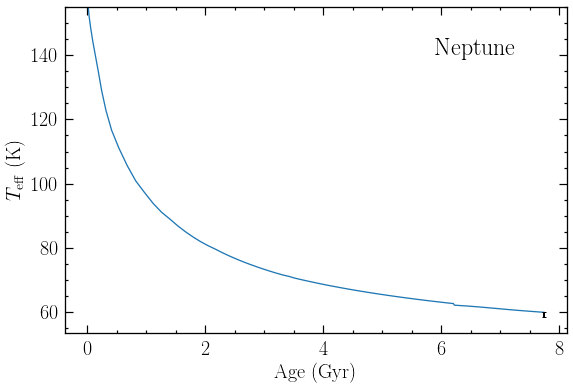

In [261]:
plt.figure(figsize=(9, 6))
plt.plot(e.history['age'], e.history['teff'])

teff, dteff = 59.3, 0.8
plt.errorbar(e.history['age'][-1], teff, dteff, ecolor='k', elinewidth=2, capsize=2, capthick=1)

plt.xlabel(r'${\rm Age}\ ({\rm Gyr})$')
plt.ylabel(r'$T_{\rm eff}\ ({\rm K})$')
plt.ylim(ymax=155)
plt.text(0.9, 0.9, 'Neptune', ha='right', va='top', transform=plt.gca().transAxes, fontsize=24)

plt.savefig('/Users/chris/jsevol/figures/neptune_teff_age.pdf', bbox_inches='tight')

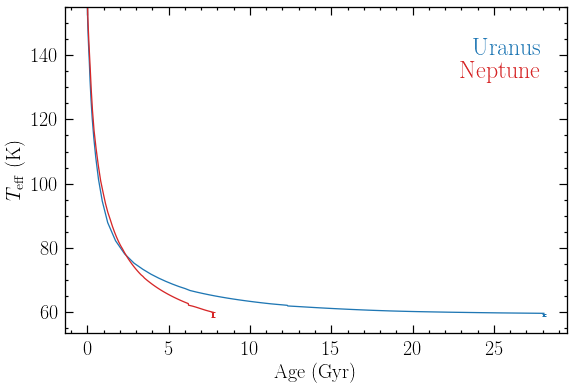

In [262]:
plt.figure(figsize=(9, 6))

for thinger in ('uranus', 'neptune'):
    with open('{}.pkl'.format(thinger), 'rb') as f:
        e = pickle.load(f)
        

    teff, dteff = {'neptune':(59.3, 0.8), 'uranus':(59.1, 0.3)}[thinger]
    color = {'uranus':color_cycle[0], 'neptune':color_cycle[3]}[thinger]
    
    plt.plot(e.history['age'], e.history['teff'], color=color)
    plt.errorbar(e.history['age'][-1], teff, dteff, ecolor=color, elinewidth=2, capsize=2, capthick=1)

plt.xlabel(r'${\rm Age}\ ({\rm Gyr})$')
plt.ylabel(r'$T_{\rm eff}\ ({\rm K})$')
plt.ylim(ymax=155)
plt.text(0.95, 0.9, 'Uranus', ha='right', va='top', transform=plt.gca().transAxes, fontsize=24, color=color_cycle[0])
plt.text(0.95, 0.83, 'Neptune', ha='right', va='top', transform=plt.gca().transAxes, fontsize=24, color=color_cycle[3])

plt.savefig('/Users/chris/jsevol/figures/un_teff_age.pdf', bbox_inches='tight')